In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 행렬과 벡터

### 덧셈

In [7]:
# 행렬과 행렬의 덧셈은 요소끼리 덧셈
A = np.matrix([[1,2],[3,4]])
B = np.matrix([[10,20],[30,40]])

A+B

matrix([[11, 22],
        [33, 44]])

In [8]:
A = np.array([[1,2],[3,4]])
B = np.array([[10,20],[30,40]])

A+B

array([[11, 22],
       [33, 44]])

### 스칼라 곱셈

In [9]:
# 행렬과 스칼라의 곱셈은 전체 요소에 곱셈
3*B

array([[ 30,  60],
       [ 90, 120]])

### 곱셈

In [10]:
# 행렬과 행렬의 곱셈
A = np.array([[1,2,3], [4,5,6]]) 
B = np.array([[2,1], [1,2], [1,1]])
print(np.dot(A,B))

# 그냥 곱하면 에러가 남 
# A*B

########################################
# 그냥 곱하고 싶으면?
A_ = np.matrix(A)
B_ = np.matrix(B)
A_*B_


[[ 7  8]
 [19 20]]


matrix([[ 7,  8],
        [19, 20]])

### 행렬의 전치

In [11]:
# 열을 행으로 행을 열로
A = np.matrix([[1,2,3],[4,5,6]])
print(A)
print(A.T)

[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]


In [12]:
# 곱의 전치
B = np.matrix([[3,4],[6,5],[1,2]]) # m n x n p -> p m 

print((A*B).T)
print(B.T * A.T)

[[18 48]
 [20 53]]
[[18 48]
 [20 53]]


### 단위행렬

In [13]:
A = np.matrix([[2, 4], [4, 2]])
I = np.matrix(np.eye(2))

print(A*I)
print(I*A)

[[2. 4.]
 [4. 2.]]
[[2. 4.]
 [4. 2.]]


## 행렬을 이용한 데이터 표현

### 테이블형 데이터


In [14]:
from sklearn.datasets import load_iris

In [15]:
data = load_iris()
 
pd.DataFrame(data.data, columns=data.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### 이미지

In [16]:
!gdown --id 1ycxVgUkjUy4UX8KhXTfJ1QoENIz_zRYv

zsh:1: command not found: gdown


In [17]:
import matplotlib as mpl

In [18]:
old_python = mpl.image.imread('old_python.png')

FileNotFoundError: [Errno 2] No such file or directory: 'old_python.png'

In [ ]:
old_python.shape

(256, 272, 4)

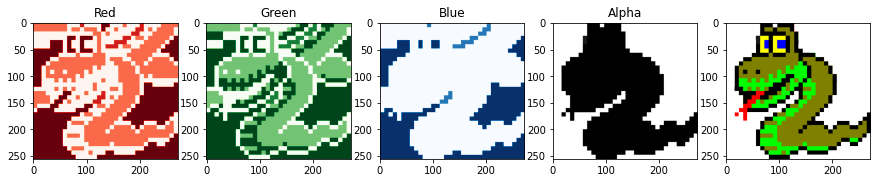

In [ ]:
fig, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=5)

ch = ['Red', 'Green', 'Blue', 'Alpha']
cm = ['Reds', 'Greens', 'Blues', 'binary']

for i, ax_i in enumerate(ax[:-1]):
    ax_i.imshow(old_python[:,:,i], cmap=cm[i])
    ax_i.set_title(ch[i])

ax[-1].imshow(old_python)

plt.show()

## 행렬곱

### 열 결합

In [ ]:
A = np.random.randint(1,10,12).reshape(4,3)
b = np.random.randint(1,10,3)

np.dot(A,b)

array([39, 24,  8, 33])

In [ ]:
# 행렬*벡터 열 결합 [+]
c = np.zeros(4, dtype=int)
for i in range(A.shape[1]):
    c += A[:,i]*b[i]

c

array([39, 24,  8, 33])

In [ ]:
A = np.random.randint(1,10,12).reshape(4,3)
B = np.random.randint(1,10,6).reshape(3,2)
np.dot(A,B)

array([[42, 70],
       [54, 56],
       [50, 40],
       [47, 92]])

In [ ]:
C = np.zeros((4,2))

# 행렬*행렬 열결합 [+]
for j in range(B.shape[1]):
    c = np.zeros(4, dtype=int)
    for i in range(A.shape[1]):
        c += A[:,i]*B[i,j]

    C[:,j] = c

print(C)

[[42. 70.]
 [54. 56.]
 [50. 40.]
 [47. 92.]]


### 행 결합

In [ ]:
At = A.T
Bt = B.T

np.dot(Bt,At)

array([[42, 54, 50, 47],
       [70, 56, 40, 92]])

In [ ]:
C = np.zeros((2,4))

# 행렬*행렬 행결합 [+]
for i in range(Bt.shape[0]):
    c = np.zeros(4, dtype=int)
    for j in range(At.shape[0]):
        c += Bt[i,j] * At[j,:]

    C[i,:] = c

print(C)

[[42. 54. 50. 47.]
 [70. 56. 40. 92.]]


### 외적합

In [ ]:
A = np.random.randint(1,10,12).reshape(4,3)
B = np.random.randint(1,10,6).reshape(3,2)

np.dot(A,B)

array([[108, 106],
       [ 40,  41],
       [ 76,  90],
       [108, 126]])

In [ ]:
C = np.zeros((4,2))

# 행렬*행렬 외적합[+]
for j in range(A.shape[1]):
    C += np.dot(A[:,[j]], B[[j],:])

print(C)

[[108. 106.]
 [ 40.  41.]
 [ 76.  90.]
 [108. 126.]]


## 인공신경망의 행렬 표현

### 데이터 로딩

In [ ]:
data = pd.read_csv('data.csv', names=['x', 'y', 'target'])
data['bias'] = 1
data

,x,y,target,bias
0,2.7540,3.5407,1.0,1
1,1.4545,2.5541,1.0,1
2,4.4647,4.4815,1.0,1
3,0.6279,1.0362,0.0,1
4,0.2573,2.2040,0.0,1
...,...,...,...,...
495,4.5226,3.8735,1.0,1
496,4.8601,1.1903,1.0,1
497,0.6119,1.2026,0.0,1
498,2.9004,1.8535,1.0,1


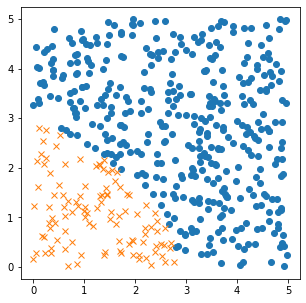

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes()

ax.plot(data[data['target']==1]['x'], data[data['target']==1]['y'], 'o')
ax.plot(data[data['target']==0]['x'], data[data['target']==0]['y'], 'x')

plt.show()

In [ ]:
X = data[['bias', 'x', 'y']].to_numpy()
y = data['target']

### 점 하나씩 계산

In [ ]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

W1 = np.array([
    [-15, 3, 5],
    [18, -6, -3]              
])

W2 = np.array([
    [4, 10, -9]
])

# 0번 점에 대해서만 계산, 엑셀 시트와 똑같은 상황[+]
a = sigmoid( np.dot(W1, X[0].T) )
print(a)
a = np.concatenate(([1], a))
print(a)
y_hat = sigmoid( np.dot(W2, a) )

y_hat, y[0]

[9.99982712e-01 1.06623499e-04]
[1.00000000e+00 9.99982712e-01 1.06623499e-04]


(array([0.99999917]), 1.0)

### 모든 점을 한번에 계산

In [ ]:
# 행렬곱으로 모든점을 한번에 계산[+]
a = sigmoid( np.dot(W1, X.T) )
print(a.shape)
a = np.concatenate((np.ones(500).reshape(1,-1), a))
print(a.shape)
y_hat = sigmoid( np.dot(W2, a) )

(2, 500)
(3, 500)


In [ ]:
pd.DataFrame([y_hat[0], y]).T

,0,1
0,0.999999,1.0
1,0.995680,1.0
2,0.999999,1.0
3,0.006718,0.0
4,0.009845,0.0
...,...,...
495,0.999999,1.0
496,0.999999,1.0
497,0.006746,0.0
498,0.999999,1.0


In [ ]:
y_hat = y_hat[0] >=0.5
y_hat

array([ True,  True,  True, False, False, False,  True,  True, False,
       False,  True, False,  True, False,  True,  True,  True, False,
        True, False,  True, False,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True, False,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False,  True, False,  True,  True, False,
        True, False, False, False,  True,  True,  True,  True, False,
        True, False, False,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,

In [ ]:
(y_hat != y).sum()

2